In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import train_test_split 

In [47]:
data=pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
Height (in cms)    18 non-null int64
Weight (in kgs)    18 non-null int64
T Shirt Size       18 non-null object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [49]:
data

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


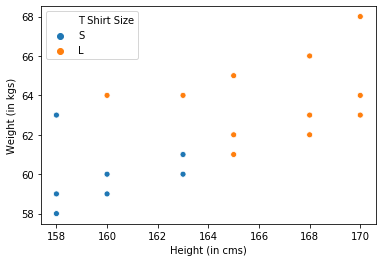

In [50]:
sns.scatterplot(x='Height (in cms)' , y='Weight (in kgs)' , data=data , hue='T Shirt Size')

In [51]:
y=data.iloc[: ,2].values

In [52]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [53]:
y=np.where(y=='S',1,0)

In [54]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## another method using label encoder

In [55]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [56]:
tesst= lab.fit_transform(data.iloc[:,2].values)

In [57]:
tesst

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
X=data.iloc[:,:2].values

In [59]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.20 , random_state=5)

In [60]:
X_train.shape

(14, 2)

In [61]:
X_test.shape

(4, 2)

In [62]:
y_train.shape

(14,)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [65]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
y_predict=classifier.predict(X_test)

In [67]:
y_predict

array([1, 1, 0, 1])

In [68]:
y_test

array([1, 1, 0, 1])

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
cm=confusion_matrix(y_test,y_predict)

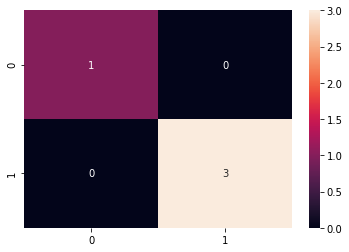

In [73]:
sns.heatmap(cm, annot=True)